In [57]:
# Some Insta Pages to Scrape

# https://www.instagram.com/visit.new.york/?hl=en
# https://www.instagram.com/travelnyc/?hl=en
# https://www.instagram.com/secret_nyc/?hl=en

In [ ]:
#!/usr/bin/python3.6
# use your Instagram username and password on line 13. Run the code and you will get an error and an instruction to set your browser to a page asking if you just logged in.
# Say Yes. and run the script again. It should run this time. If you get a recursion error, refresh this page again by putting your cursor on the URL bar and hitting Enter. Now run the script. Should work.
import instaloader
import  time
import  pandas as pd
import sys
sys.setrecursionlimit(10000)
from datetime import datetime
from itertools import dropwhile, takewhile

L = instaloader.Instaloader()
L.login("****", "****")
df=pd.DataFrame()

#CODE TO GET DATA FROM AN ACCOUNT

i=0
for post in instaloader.Profile.from_username(L.context, 'nycgov').get_posts():
    df = df.append({'Caption': post.caption, 'Likes': post.likes, 'URL': post.url  }, ignore_index=True)
    df.to_excel("nyc.xlsx",index=False)
    i = i+1
    if i>1000:
        break
    if i%100==0:
        print(i)
print("Written to nyc.xlsx file")

In [ ]:
#!pip install --upgrade google-api-python-client
#!pip install google-cloud-vision
#!pip install xlrd==1.2.0

In [ ]:
import xlrd
from google.cloud import vision
import os
import pandas as pd

In [ ]:
!cd

C:\Users\prakh\Desktop\UT\Unstructured Analytics\Project


In [ ]:
Application_Credentials = #r'C:\Users\prakh\Desktop\UT\Unstructured Analytics\Project\insta_json_key.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = Application_Credentials
client = vision.ImageAnnotatorClient()
image = vision.Image()
#urls.xlsx has the image urls 
#loc = ("nyc.xlsx")
#wb = xlrd.open_workbook_xls(loc)
wb = pd.read_excel('nyc.xlsx', engine='openpyxl')
# sheet = wb.sheet_by_index(0)
# sheet.cell_value(0, 0)
df = pd.DataFrame()
# loop through every url, retreive the image and send to google vision
for i in range(len(wb)):
    image_src_temp = wb.loc[i,'URL']
    image.source.image_uri = image_src_temp
    response = client.label_detection(image=image)
    labels = response.label_annotations
    l = []
    for label in labels:
        l.append(label.description)
    s = ' '.join(l)
    df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
df.to_excel("NYC_Labels.xlsx",index=False)

In [4]:
# Reuploading Files and Reading from XLSX files

from google.colab import files
files.upload()

wb = pd.read_excel('nyc.xlsx')
df = pd.read_excel('NYC_Labels.xlsx')

master_df = pd.concat([wb,df[['Labels']]],axis=1)

In [5]:
master_df

,Caption,Likes,URL,Labels
0,Every day a New Yorker dies waiting for a tran...,29,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Smile Sleeve Font Happy Job Poster Wrinkle Eve...
1,Cover up New York’s beauty?\n\nFOG-gettaboutit.,432,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Skyscraper Atmosphere Daytime Building Cloud W...
2,This might be the most perfect day of the year...,221,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Water Sky Building Cloud Font Tower block Real...
3,Sunset #intheBronx.,437,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Cloud Sky Building Window Nature Plant Orange ...
4,Climate change is happening NOW. \n\nThe New N...,278,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Water Water resources Plant World Asphalt Natu...
...,...,...,...,...
599,"Have a great weekend, New York. It’s been wait...",807,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Skyscraper Water Sky Building Daytime Dusk Tow...
600,Cloudy day in Manhattan.,564,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Cloud Sky Building Skyscraper Atmosphere Dayti...
601,Bundle up!,351,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Footwear Water Human Asphalt Standing Window R...
602,"Stay golden, New York City.",459,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Cloud Sky Daytime Window Building Blue Branch ...


## LDA on Captions and Image Recognition Keywords

In [ ]:
#!pip install gensim

In [2]:
import numpy as nt
import os, csv, nltk
import pandas as pd
import numpy as np
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import PunktSentenceTokenizer,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import gensim

In [3]:
import pandas as pd 
from gensim.models import ldamodel as lda

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
master_list = master_df["Labels"].tolist()
master_list

['Smile Sleeve Font Happy Job Poster Wrinkle Event Brand Collar',
 'Skyscraper Atmosphere Daytime Building Cloud Water Sky Tower block World Cityscape',
 'Water Sky Building Cloud Font Tower block Real estate Facade Lake City',
 'Cloud Sky Building Window Nature Plant Orange Dusk Tree Afterglow',
 'Water Water resources Plant World Asphalt Natural landscape Road surface Tree Urban design Thoroughfare',
 'Water Cloud Building Sky Boat Skyscraper Watercraft Naval architecture Vehicle Mast',
 'Cloud Water Sky Atmosphere Afterglow Natural landscape Red sky at morning Dusk Sunlight Lake',
 'Skyscraper Building Sky World Tower block Tree Urban design Biome Tower Condominium',
 'Rectangle Font Parallel Circle Number',
 'Window Table Chair Building Motor vehicle Coat Urban design Community City Suit',
 'Cloud Water Sky Water resources Atmosphere Daytime Building World Nature Natural landscape',
 'Skyscraper Cloud Sky Building Tower World Tower block Condominium Commercial building Real estate'

In [8]:
for i in range(0,len(master_list)):
    master_list[i] = str(master_list[i])
master_df['Labels'] = master_list

In [9]:
#checking for nulls if present any
print("Number of rows with any of the empty columns:")
print(master_df.isnull().sum().sum())
master_df=master_df.dropna()

Number of rows with any of the empty columns:
3


In [10]:
word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))

In [11]:
def tokenize_text(version_desc):
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

In [12]:
master_df['tokens'] = master_df['Labels'].apply(tokenize_text)
master_df['tokens'] = master_df['tokens'].apply(lambda x: str(x)).apply(tokenize_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
master_df

,Caption,Likes,URL,Labels,tokens
0,Every day a New Yorker dies waiting for a tran...,29,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Smile Sleeve Font Happy Job Poster Wrinkle Eve...,"[smile, sleeve, font, happy, job, poster, wrin..."
1,Cover up New York’s beauty?\n\nFOG-gettaboutit.,432,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Skyscraper Atmosphere Daytime Building Cloud W...,"[skyscraper, atmosphere, daytime, building, cl..."
2,This might be the most perfect day of the year...,221,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Water Sky Building Cloud Font Tower block Real...,"[water, sky, building, cloud, font, tower, blo..."
3,Sunset #intheBronx.,437,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Cloud Sky Building Window Nature Plant Orange ...,"[cloud, sky, building, window, nature, plant, ..."
4,Climate change is happening NOW. \n\nThe New N...,278,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Water Water resources Plant World Asphalt Natu...,"[water, water, resources, plant, world, asphal..."
...,...,...,...,...,...
599,"Have a great weekend, New York. It’s been wait...",807,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Skyscraper Water Sky Building Daytime Dusk Tow...,"[skyscraper, water, sky, building, daytime, du..."
600,Cloudy day in Manhattan.,564,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Cloud Sky Building Skyscraper Atmosphere Dayti...,"[cloud, sky, building, skyscraper, atmosphere,..."
601,Bundle up!,351,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Footwear Water Human Asphalt Standing Window R...,"[footwear, water, human, asphalt, standing, wi..."
602,"Stay golden, New York City.",459,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Cloud Sky Daytime Window Building Blue Branch ...,"[cloud, sky, daytime, window, building, blue, ..."


## Adit Barua Code

In [16]:
!pip install lda
import os, csv, nltk, lda

     |████████████████████████████████| 351 kB 10.9 MB/s 
     |████████████████████████████████| 99 kB 9.1 MB/s 


In [14]:
vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(master_df['Labels'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [21]:
# model = lda.LDA(n_topics=4, n_iter=500, random_state=1)
# model.fit(total_features_words)

# topic_word = model.topic_word_
# doc_topic = model.doc_topic_
# doc_topic = pd.DataFrame(doc_topic)
# master_df = master_df.join(doc_topic)
# insta = pd.DataFrame()

# for i in range(4)):
#     topic="topic_"+str(i)
#     insta[topic]=master_df.groupby([restaurant_name])[i].mean()


insta = insta.reset_index()
topics = pd.DataFrame(topic_word)
topics.columns = vec_words.get_feature_names()
topics1 = topics.transpose()


# print ("Topics word distribution written in file topic_word_dist.xlsx ")
# topics1.to_excel("topic_word_dist.xlsx")
# restaurant.to_excel("document_topic_dist.xlsx",index=False)
# print ("Document topic distribution written in file document_topic_dist.xlsx ")


In [19]:
master_df

,Caption,Likes,URL,Labels,tokens,0,1,2,3
0,Every day a New Yorker dies waiting for a tran...,29,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Smile Sleeve Font Happy Job Poster Wrinkle Eve...,"[smile, sleeve, font, happy, job, poster, wrin...",0.009615,0.490385,0.490385,0.009615
1,Cover up New York’s beauty?\n\nFOG-gettaboutit.,432,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Skyscraper Atmosphere Daytime Building Cloud W...,"[skyscraper, atmosphere, daytime, building, cl...",0.008772,0.008772,0.008772,0.973684
2,This might be the most perfect day of the year...,221,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Water Sky Building Cloud Font Tower block Real...,"[water, sky, building, cloud, font, tower, blo...",0.008065,0.088710,0.008065,0.895161
3,Sunset #intheBronx.,437,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Cloud Sky Building Window Nature Plant Orange ...,"[cloud, sky, building, window, nature, plant, ...",0.009615,0.009615,0.009615,0.971154
4,Climate change is happening NOW. \n\nThe New N...,278,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Water Water resources Plant World Asphalt Natu...,"[water, water, resources, plant, world, asphal...",0.215278,0.006944,0.006944,0.770833
...,...,...,...,...,...,...,...,...,...
599,"Have a great weekend, New York. It’s been wait...",807,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Skyscraper Water Sky Building Daytime Dusk Tow...,"[skyscraper, water, sky, building, daytime, du...",0.009615,0.009615,0.009615,0.971154
600,Cloudy day in Manhattan.,564,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Cloud Sky Building Skyscraper Atmosphere Dayti...,"[cloud, sky, building, skyscraper, atmosphere,...",0.169355,0.008065,0.814516,0.008065
601,Bundle up!,351,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Footwear Water Human Asphalt Standing Window R...,"[footwear, water, human, asphalt, standing, wi...",NaN,NaN,NaN,NaN
602,"Stay golden, New York City.",459,https://instagram.fftw1-1.fna.fbcdn.net/v/t51....,Cloud Sky Daytime Window Building Blue Branch ...,"[cloud, sky, daytime, window, building, blue, ...",NaN,NaN,NaN,NaN


In [56]:
topics1
topics1.to_csv('topics1.csv') 
files.download('topics1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

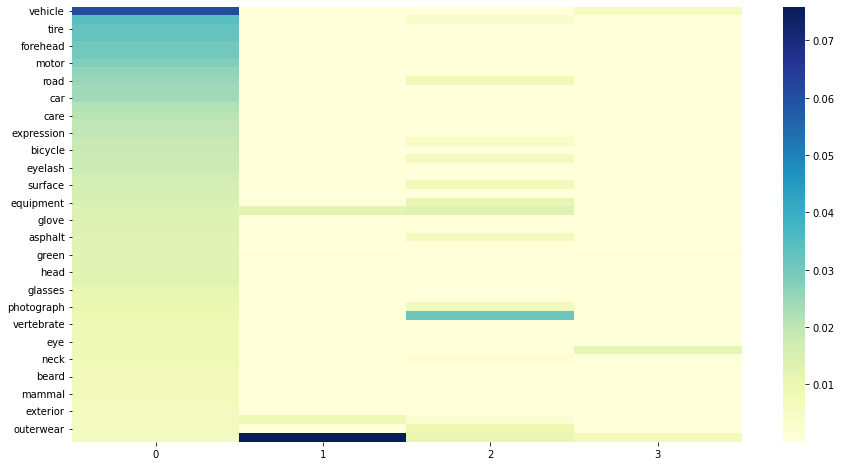

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))

top1 = topics1.sort_values(by=[0],ascending=False)[:50]
sns.heatmap(top1[:50],cmap='YlGnBu')

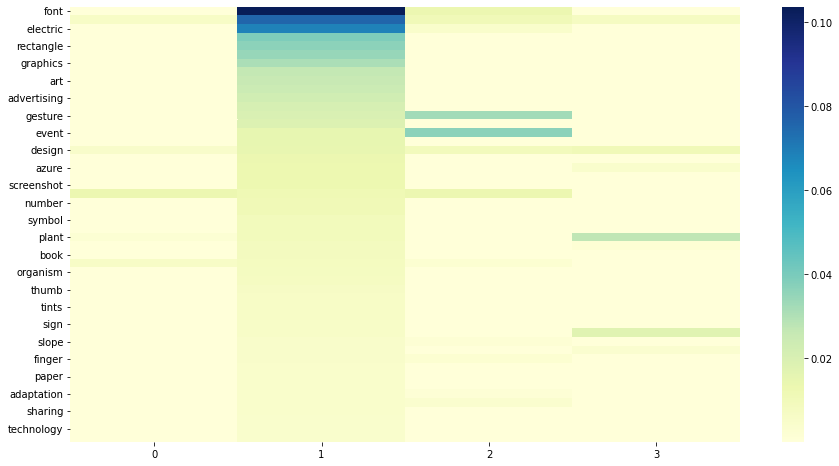

In [52]:
plt.figure(figsize=(15,8))

top2 = topics1.sort_values(by=[1],ascending=False)[:50]
sns.heatmap(top2[:50],cmap='YlGnBu')

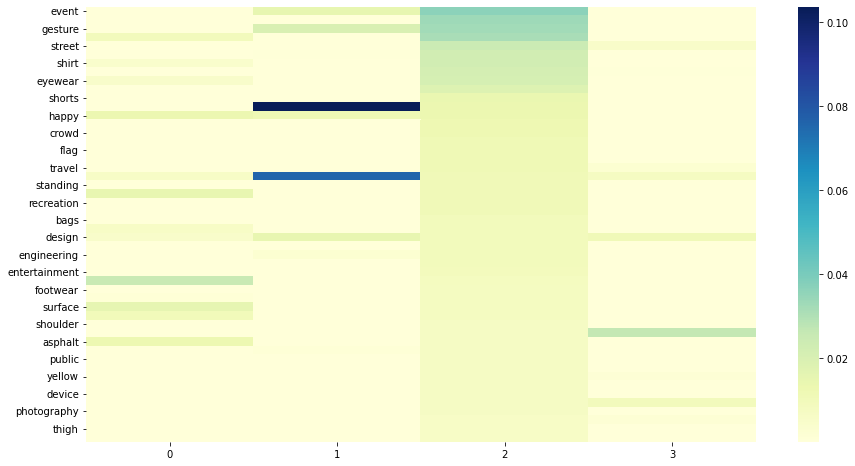

In [53]:
plt.figure(figsize=(15,8))

top3 = topics1.sort_values(by=[2],ascending=False)[:50]
sns.heatmap(top3[:50],cmap='YlGnBu')

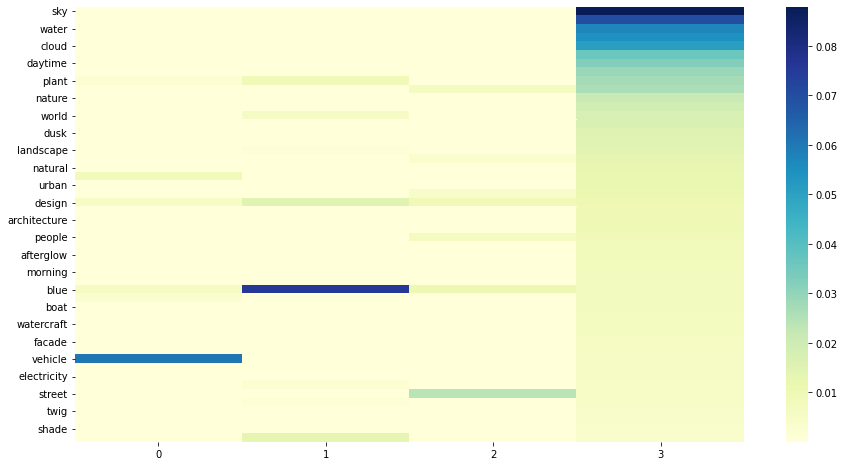

In [49]:
plt.figure(figsize=(15,8))

top4 = topics1.sort_values(by=[3],ascending=False)[:50]
sns.heatmap(top4[:50],cmap='YlGnBu')

In [47]:
top4

,0,1,2,3
sky,0.000010,0.000005,0.000006,0.087891
building,0.000010,0.000005,0.000006,0.070071
water,0.000010,0.000005,0.000006,0.057110
tower,0.000010,0.000005,0.000006,0.054680
cloud,0.000010,0.000005,0.000006,0.051035
skyscraper,0.000010,0.000005,0.000006,0.036455
daytime,0.000010,0.000005,0.000006,0.032405
block,0.000010,0.000005,0.000006,0.029165
plant,0.002109,0.009414,0.000006,0.027140
tree,0.000010,0.000005,0.007048,0.026330


In [ ]:
#!/usr/bin/python3.6
#Install LDA library if not already installed
# pip3.6 install --user lda
# the input file is a two-column file yelp_reviews_short.xslx
# there are two output files: topic_word_dist.xlsx and document_topic_dist.xlsx
# the script prompts for the name of the columns -- Restaurant_name and Restaurant_review in the yelp_reviews_short.xslx file
#Revised by Aadit Barua
import numpy as nt
import os, csv, nltk, lda
import pandas as pd
import numpy as np
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import PunktSentenceTokenizer,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
reviews_df=pd.read_excel("yelp_reviews_short.xlsx",encoding='utf8', errors='ignore')
reviews_list = reviews_df["tweet"].tolist()
for i in range(0,len(reviews_list)):
    reviews_list[i] = str(reviews_list[i])
reviews_df['tweet'] = reviews_list

#checking for nulls if present any
print("Number of rows with any of the empty columns:")
print(reviews_df.isnull().sum().sum())
reviews_df=reviews_df.dropna()

restaurant_name = input('provide the column name for id: ')
restaurant_review = input('provide the column name for text: ')
ntopics= input('Provide the number of latent topics: ');



word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))


def tokenize_text(version_desc):
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(reviews_df[restaurant_review])

print(total_features_words.shape)

model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
model.fit(total_features_words)

topic_word = model.topic_word_
doc_topic=model.doc_topic_
doc_topic=pd.DataFrame(doc_topic)
reviews_df=reviews_df.join(doc_topic)
restaurant=pd.DataFrame()

for i in range(int(ntopics)):
    topic="topic_"+str(i)
    restaurant[topic]=reviews_df.groupby([restaurant_name])[i].mean()

restaurant=restaurant.reset_index()
topics=pd.DataFrame(topic_word)
topics.columns=vec_words.get_feature_names()
topics1=topics.transpose()
print ("Topics word distribution written in file topic_word_dist.xlsx ")
topics1.to_excel("topic_word_dist.xlsx")
restaurant.to_excel("document_topic_dist.xlsx",index=False)
print ("Document topic distribution written in file document_topic_dist.xlsx ")


#### Sklearn LDA

In [ ]:
vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(master_df['Labels'])

In [ ]:
master_df.shape

(604, 5)

In [ ]:
len(vec_words.get_feature_names())

608

In [ ]:
total_features_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda = LatentDirichletAllocation(n_components=5,random_state=0)

In [ ]:
lda_matrix = lda.fit(total_features_words)

In [ ]:
lda_matrix

LatentDirichletAllocation(n_components=5, random_state=0)

In [ ]:
lda.fit_transform(total_features_words)

array([[0.50211369, 0.01818256, 0.44320301, 0.01828424, 0.01821649],
       [0.01667605, 0.93329716, 0.01666671, 0.0166914 , 0.01666868],
       [0.09209329, 0.86096513, 0.01542856, 0.01600037, 0.01551265],
       ...,
       [0.01666894, 0.23694284, 0.44642763, 0.01707331, 0.28288729],
       [0.19152815, 0.75341004, 0.01819921, 0.01836355, 0.01849904],
       [0.01542088, 0.01540119, 0.93835782, 0.01539015, 0.01542996]])

In [ ]:
lda_output = lda.transform(total_features_words)

In [ ]:
lda_output.shape

(604, 5)

In [ ]:
# topicnames = ["Topic" + str(i) for i in range(lda_output.n_topics)]

AttributeError: 'numpy.ndarray' object has no attribute 'n_topics'

In [ ]:
master_df['tokens']

0      [smile, sleeve, font, happy, job, poster, wrin...
1      [skyscraper, atmosphere, daytime, building, cl...
2      [water, sky, building, cloud, font, tower, blo...
3      [cloud, sky, building, window, nature, plant, ...
4      [water, water, resources, plant, world, asphal...
                             ...                        
599    [skyscraper, water, sky, building, daytime, du...
600    [cloud, sky, building, skyscraper, atmosphere,...
601    [footwear, water, human, asphalt, standing, wi...
602    [cloud, sky, daytime, window, building, blue, ...
603    [jeans, smile, flash, photography, sleeve, str...
Name: tokens, Length: 604, dtype: object

In [ ]:
common_dictionary = Dictionary(master_df['tokens'])

In [ ]:
common_dictionary

In [ ]:
common_corpus = [common_dictionary.doc2bow(text) for text in master_df['tokens']]

In [ ]:
common_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(3, 1),
  (11, 1),
  (12, 1),
  (14, 1),
  (16, 1),
  (18, 1),
  (19, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(12, 1),
  (14, 1),
  (16, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(19, 2),
  (20, 1),
  (30, 1),
  (31, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(12, 1),
  (14, 1),
  (16, 1),
  (17, 1),
  (19, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1)],
 [(10, 1),
  (14, 1),
  (16, 2),
  (19, 1),
  (24, 1),
  (26, 1),
  (27, 1),
  (35, 1),
  (36, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(11, 1),
  (12, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (20, 1),
  (31, 1),
  (34, 1),
  (41, 1),
  (52, 1),
  (53, 1)],
 [

In [ ]:
model = lda.LdaModel(common_corpus,num_topics=4)#, alpha='auto', eval_every=5)

In [ ]:
model.num_topics

4

In [ ]:
model.

In [ ]:
for i in model.show_topics(num_words=100):
    print(i[1])

0.047*"76" + 0.034*"3" + 0.032*"77" + 0.028*"18" + 0.025*"16" + 0.023*"12" + 0.020*"2" + 0.020*"0" + 0.017*"19" + 0.017*"117" + 0.014*"17" + 0.014*"14" + 0.014*"11" + 0.014*"108" + 0.013*"57" + 0.011*"157" + 0.010*"34" + 0.009*"95" + 0.009*"158" + 0.009*"86" + 0.009*"54" + 0.009*"46" + 0.009*"21" + 0.009*"15" + 0.008*"71" + 0.007*"213" + 0.007*"6" + 0.006*"105" + 0.006*"53" + 0.006*"27" + 0.006*"7" + 0.006*"13" + 0.005*"180" + 0.005*"61" + 0.005*"32" + 0.005*"38" + 0.005*"204" + 0.005*"102" + 0.005*"130" + 0.005*"68" + 0.005*"275" + 0.005*"97" + 0.005*"384" + 0.005*"20" + 0.004*"307" + 0.004*"65" + 0.004*"115" + 0.004*"184" + 0.004*"383" + 0.004*"33" + 0.004*"39" + 0.004*"139" + 0.004*"207" + 0.004*"30" + 0.004*"152" + 0.004*"155" + 0.004*"55" + 0.004*"228" + 0.004*"187" + 0.004*"221" + 0.004*"41" + 0.004*"56" + 0.004*"87" + 0.004*"149" + 0.004*"88" + 0.004*"150" + 0.003*"430" + 0.003*"142" + 0.003*"274" + 0.003*"491" + 0.003*"91" + 0.003*"23" + 0.003*"119" + 0.003*"83" + 0.003*"109" +

In [ ]:
doc_topics = model.get_document_topics(bow=common_corpus)

In [ ]:
[x for x in doc_topics]

[[(0, 0.77819365), (1, 0.024477629), (2, 0.025260763), (3, 0.17206796)],
 [(0, 0.021745997), (1, 0.021217946), (2, 0.022782817), (3, 0.9342533)],
 [(0, 0.020138148), (1, 0.01957285), (2, 0.38896748), (3, 0.57132155)],
 [(0, 0.02470088), (1, 0.023291001), (2, 0.9272933), (3, 0.024714785)],
 [(0, 0.017819125), (1, 0.017424367), (2, 0.017636439), (3, 0.9471201)],
 [(0, 0.021314787), (1, 0.021097932), (2, 0.021292176), (3, 0.9362951)],
 [(0, 0.017161077), (1, 0.016913211), (2, 0.5272108), (3, 0.43871495)],
 [(0, 0.019855792), (1, 0.019609388), (2, 0.020372678), (3, 0.9401622)],
 [(0, 0.8702259), (1, 0.044301867), (2, 0.042844635), (3, 0.04262755)],
 [(0, 0.93778366), (1, 0.021072028), (2, 0.020368386), (3, 0.020775916)],
 [(0, 0.02025139), (1, 0.01956029), (2, 0.02121687), (3, 0.93897146)],
 [(0, 0.018318657), (1, 0.01849719), (2, 0.025486585), (3, 0.9376976)],
 [(0, 0.019428506), (1, 0.9433832), (2, 0.018577442), (3, 0.018610796)],
 [(0, 0.02203203), (1, 0.9325603), (2, 0.02262951), (3, 0

In [ ]:
lda.LdaModel.inference([common_corpus])

TypeError: inference() missing 1 required positional argument: 'chunk'

C:\Users\prakh\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [ ]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

In [ ]:
vec_words.vocabulary_

{'smile': 487,
 'sleeve': 483,
 'font': 212,
 'happy': 257,
 'job': 294,
 'poster': 421,
 'wrinkle': 603,
 'event': 177,
 'brand': 71,
 'collar': 115,
 'skyscraper': 482,
 'atmosphere': 32,
 'daytime': 143,
 'building': 78,
 'cloud': 112,
 'water': 581,
 'sky': 481,
 'tower': 550,
 'block': 58,
 'world': 602,
 'cityscape': 106,
 'real': 435,
 'estate': 176,
 'facade': 185,
 'lake': 299,
 'city': 105,
 'window': 593,
 'nature': 358,
 'plant': 410,
 'orange': 372,
 'dusk': 162,
 'tree': 558,
 'afterglow': 6,
 'resources': 443,
 'asphalt': 29,
 'natural': 357,
 'landscape': 303,
 'road': 447,
 'surface': 520,
 'urban': 568,
 'design': 147,
 'thoroughfare': 543,
 'boat': 61,
 'watercraft': 582,
 'naval': 359,
 'architecture': 21,
 'vehicle': 571,
 'mast': 329,
 'red': 440,
 'morning': 346,
 'sunlight': 515,
 'biome': 54,
 'condominium': 126,
 'rectangle': 439,
 'parallel': 385,
 'circle': 104,
 'number': 366,
 'table': 528,
 'chair': 97,
 'motor': 347,
 'coat': 114,
 'community': 120,
 'su

In [ ]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
common_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

TypeError: 'module' object is not callable

In [ ]:


restaurant_name = input('provide the column name for id: ')
restaurant_review = input('provide the column name for text: ')
ntopics= input('Provide the number of latent topics: ');









topic_word = model.topic_word_
doc_topic=model.doc_topic_
doc_topic=pd.DataFrame(doc_topic)
reviews_df=reviews_df.join(doc_topic)
restaurant=pd.DataFrame()

for i in range(int(ntopics)):
    topic="topic_"+str(i)
    restaurant[topic]=reviews_df.groupby([restaurant_name])[i].mean()

restaurant=restaurant.reset_index()
topics=pd.DataFrame(topic_word)
topics.columns=vec_words.get_feature_names()
topics1=topics.transpose()
print ("Topics word distribution written in file topic_word_dist.xlsx ")
topics1.to_excel("topic_word_dist.xlsx")
restaurant.to_excel("document_topic_dist.xlsx",index=False)
print ("Document topic distribution written in file document_topic_dist.xlsx ")